In [7]:
import numpy as np
import pandas as pd
import datetime


In [8]:
df=pd.read_csv('traffic.csv')
df

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...,...
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


In [9]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [42]:
df.describe(include='O')

,event,country,city,artist,album,track,isrc,linkid
count,219157,219149,219149,219157,219157,219157,219157,219157
unique,3,211,11690,590,676,693,709,743
top,pageview,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,137121,46960,22588,40841,40841,40841,40841,40841


Making time usable and removing the useless rows.

In [72]:
df['date'] = pd.to_datetime(df['date'])
df = df.dropna(subset=['event', 'linkid'])
df = df.sort_values(['linkid', 'date'])

In [17]:
df['time_diff'] = df.groupby('linkid')['date'].diff().dt.seconds
df['new_session'] = (df['time_diff'] > 1800) | (df['time_diff'].isna())
df['session_id'] = df.groupby('linkid')['new_session'].cumsum()


Users & Sessions

In [52]:
users = df['linkid'].nunique()
sessions = df[['linkid','session_id']].drop_duplicates().shape[0]
print('Users :', users)
print('Sessions:' ,sessions)


Users : 743
Sessions: 743


Average Session Duration


In [19]:
session_duration = df.groupby(['linkid', 'session_id'])['date'].apply(lambda x: (x.max() - x.min()).total_seconds())
average_session_duration = session_duration.mean()
print(f"Average session duration: {average_session_duration:.2f} seconds")

Average session duration: 332808.61 seconds


Bounce Rate

In [56]:
events_per_session = df.groupby(['linkid','session_id'])['event'].count().mean()
bounce_rate = (events_per_session == 1).mean() * 100
print('bounce_rate:',bounce_rate)
print('events_per_session',events_per_session)

bounce_rate: 0.0
events_per_session 294.96231493943475


Entry & Exit Events

In [68]:
entry_events = df.groupby(['linkid','session_id']).first()['event'].value_counts().mean()
exit_events = df.groupby(['linkid','session_id']).last()['event'].value_counts().mean()
print('entry_events',entry_events)
print('exit_events',exit_events)



entry_events 247.66666666666666
exit_events 371.5


Traffic Breakdown (Geography & Content)

In [70]:
top_countries = df['country'].value_counts()
top_cities = df['city'].value_counts()
top_artists = df['artist'].value_counts()
top_tracks = df['track'].value_counts()

print('Top Countries:')
print(top_countries.head())
print('\nTop Cities:')
print(top_cities.head())
print('\nTop Artists:')
print(top_artists.head())
print('\nTop Tracks:')
print(top_tracks.head())

Top Countries:
country
Saudi Arabia     46960
India            42991
United States    27355
France           15638
Iraq              8168
Name: count, dtype: int64

Top Cities:
city
Jeddah       22588
Riyadh       17341
Unknown      16092
Hyderabad     3682
Dammam        3242
Name: count, dtype: int64

Top Artists:
artist
Tesher                                                          40841
Anne-Marie                                                      10649
Tundra Beats                                                     9750
Surf Mesa, Emilee                                                7524
DMNDS, Strange Fruits Music, Fallen Roses, Lujavo, Nito-Onna     5512
Name: count, dtype: int64

Top Tracks:
track
Jalebi Baby                             40841
Beautiful                               10658
Beautiful Day                            9750
ily (i love you baby) (feat. Emilee)     7524
So Pretty                                5664
Name: count, dtype: int64


Visualization

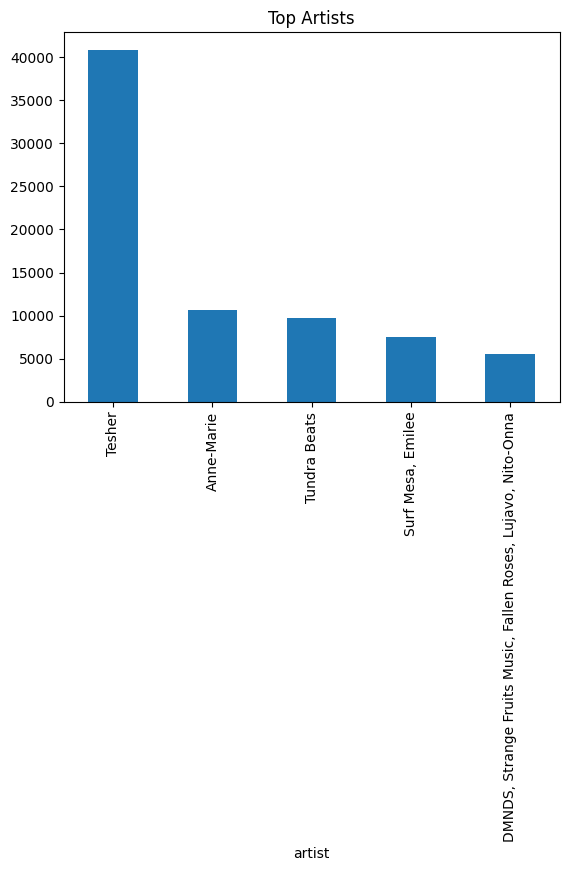

In [30]:
import matplotlib.pyplot as plt

top_artists = df['artist'].value_counts()
top_artists.head(5).plot(kind='bar', title='Top Artists')
plt.show()


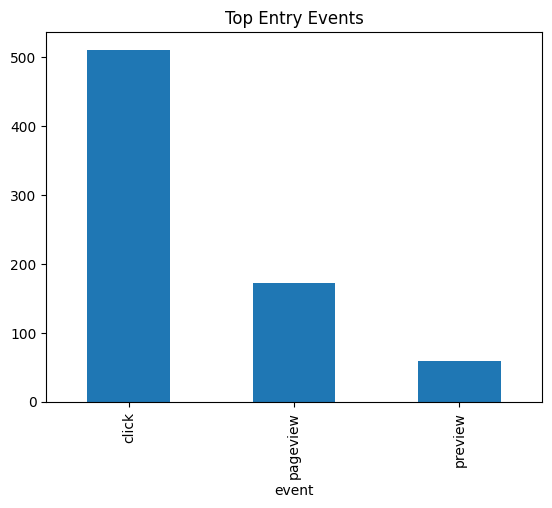

In [31]:

entry_events.head(5).plot(kind='bar', title='Top Entry Events')
plt.show()

In [28]:
user_journeys = df.groupby(['linkid','session_id'])['event'].apply(list)
user_journeys.head()

,,event
linkid,session_id,
006af6a0-1f0d-4b0c-93bf-756af9071c06,1,"[preview, pageview, pageview, pageview, pagevi..."
00759b81-3f04-4a61-b934-f8fb3185f4a0,1,"[click, pageview, click, preview, pageview, pa..."
00829040-ee01-4409-966d-d67c7965144a,1,"[click, click, click, click, click, preview, p..."
009193ee-c3df-4efa-88f2-feb37c0bfdf2,1,"[click, pageview, pageview, click, pageview]"
00de7566-f014-4d20-8616-82e4dea45b88,1,"[preview, pageview, pageview, click, pageview,..."
